In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Load the data
data = pd.read_csv("flight/flight-pwmy-change.txt")

mx = data.iloc[:,8]
my = data.iloc[:,9]
mz = data.iloc[:,10]
pwm =  data.iloc[:,1]

zero_pwm_index  = pwm[pwm == 0].index.tolist()[0]

#mag readings when pwm==0
mx_offset = mx[zero_pwm_index]
my_offset = my[zero_pwm_index]
mz_offset = mz[zero_pwm_index]

start = 0
end = len(data)

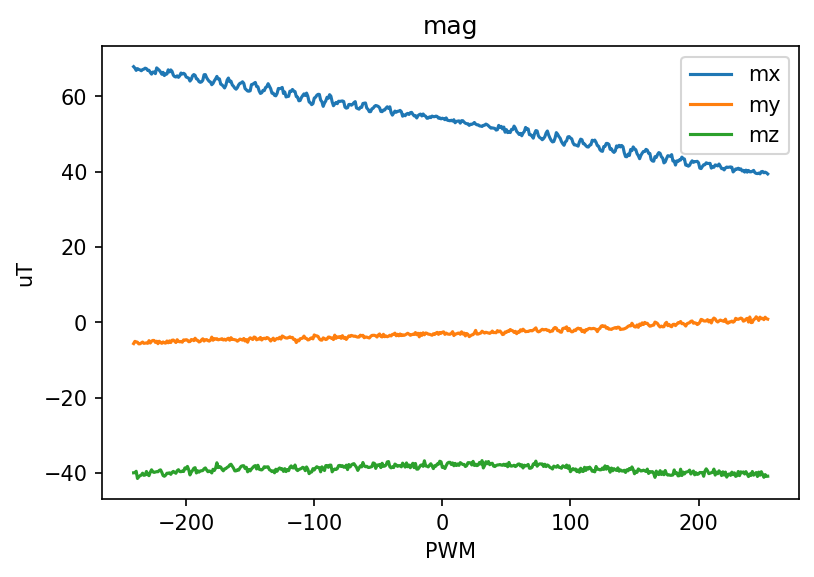

In [8]:
plt.figure(dpi=150)
plt.plot(pwm[start:end], mx[start:end], label = "mx")
plt.plot(pwm[start:end], my[start:end], label = "my")
plt.plot(pwm[start:end], mz[start:end], label = "mz")
plt.xlabel("PWM")
plt.ylabel("uT")
plt.title("mag")
plt.legend()
plt.show()

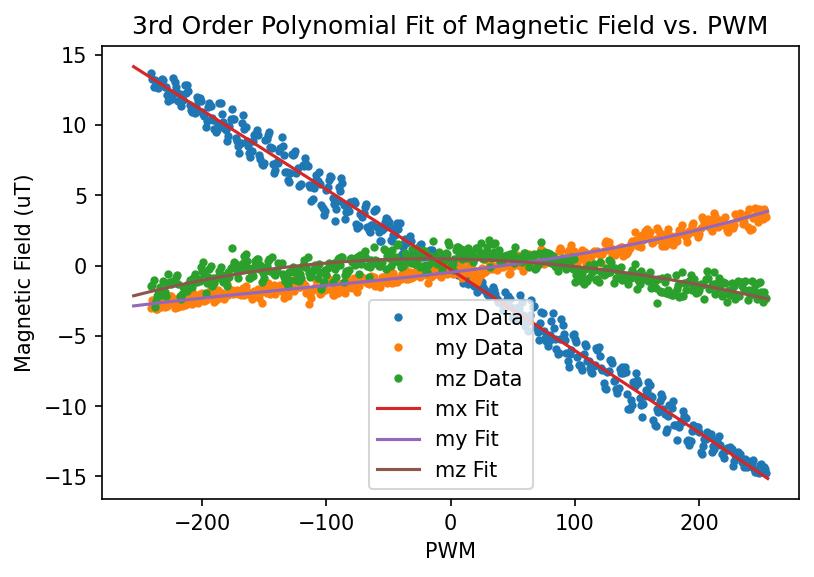

PWM_z to Magx: [-2.51577860e-09 -3.32941558e-06 -5.72642735e-02 -2.86281164e-01]
PWM_z to Magy: [ 4.08621328e-08  1.49763107e-05  1.05421663e-02 -4.81508549e-01]
PWM_z to Magz: [ 1.38842133e-08 -4.21466668e-05 -1.35291840e-03  4.72386105e-01]


In [9]:

coeffs_mx = np.polyfit(pwm[start:end], mx[start:end]-mx_offset, 3)
coeffs_my = np.polyfit(pwm[start:end], my[start:end]-my_offset, 3)
coeffs_mz = np.polyfit(pwm[start:end], mz[start:end]-mz_offset, 3)

# Create polynomial functions from the coefficients
poly_mx = np.poly1d(coeffs_mx)
poly_my = np.poly1d(coeffs_my)
poly_mz = np.poly1d(coeffs_mz)
# Generate a range of PWM values for plotting the fit
pwm_fit = np.linspace(-255, 255, 500)

# Plot the original data
plt.figure(dpi=150)
plt.plot(pwm[start:end], mx[start:end]-mx_offset, '.', label="mx Data")
plt.plot(pwm[start:end], my[start:end]-my_offset, '.', label="my Data")
plt.plot(pwm[start:end], mz[start:end]-mz_offset, '.', label="mz Data")

# Plot the fitted curves
plt.plot(pwm_fit, poly_mx(pwm_fit), label="mx Fit")
plt.plot(pwm_fit, poly_my(pwm_fit), label="my Fit")
plt.plot(pwm_fit, poly_mz(pwm_fit), label="mz Fit")
plt.xlabel("PWM")
plt.ylabel("Magnetic Field (uT)")
plt.title("3rd Order Polynomial Fit of Magnetic Field vs. PWM")


plt.legend()
plt.show()

print("PWM_z to Magx: "+ str(coeffs_mx))
print("PWM_z to Magy: "+ str(coeffs_my))
print("PWM_z to Magz: "+ str(coeffs_mz))

In [ ]:
pwm